# Christmas Date Predictor
This year has been a rough year for everyone and a lot of people have been wondering if Christmas will happen this year because of social distancing, lockdowns, and the pandemic. This question led me to try analyse previous data on the dates of Christmas day to try and create a predictive model for what day Christmas would occur if it were to occur this year (hopefully it will).

Before the data analysis and model building, I import the libraries I am going to need and the dataset itself.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv("christmas dates.csv")

In [3]:
# preview the dataset
df.head()

,country,day,month,year
0,Australia,25,12,2019
1,Bosnia and Herzegovina,25,12,2019
2,Brazil,25,12,2019
3,Bulgaria,25,12,2019
4,Canada,25,12,2019


## Exploratory Data Analysis
Firstly I am going to run an exploratory data analysis on our data set to see if there are any patterns or insights we can gain from it.

In [4]:
# how many rows of data do we have?
print(f"There are {df.shape[0]} rows of data")

There are 246 rows of data


In [5]:
# how many unique countries do we have in the data?
print(f"There are {df.country.nunique()} unique countries")

There are 41 unique countries


In [6]:
# are the data types correct
df.dtypes

country    object
day         int64
month       int64
year        int64
dtype: object

The datatypes of the dataset seem correct.

Let's have a look at the summary statistics.

In [7]:
# summary statistics
df[["day", "month"]].describe()

,day,month
count,246.0,246.0
mean,25.0,12.0
std,0.0,0.0
min,25.0,12.0
25%,25.0,12.0
50%,25.0,12.0
75%,25.0,12.0
max,25.0,12.0


We see that for the day and month columns, all the values are all the same in their respective columns (mean == min == 25% == 50% == 75% == max). This in addition to the standard deviations of zero for both columns, suggests that there is no spread or variation in the data. This means the mean is probably very representative of the data.

Let's try plot the data using boxplots.

<AxesSubplot:xlabel='day'>

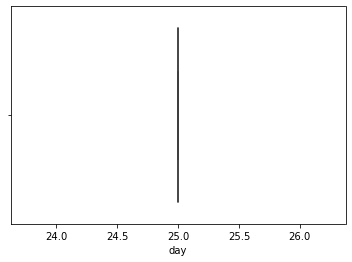

In [8]:
# day boxplot
sns.boxplot(x="day", data=df)

<AxesSubplot:xlabel='month'>

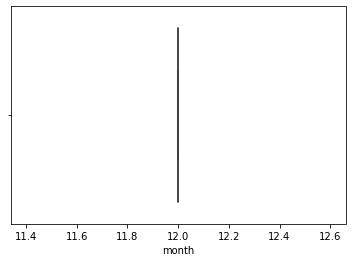

In [9]:
# month boxplot
sns.boxplot(x="month", data=df)

Once again it seems our boxplots support our previous findings about the variance in our data.

## Model Building
Now it's time to build our predictive model. For this, I will be using a multioutput regression to predict both the day and the month that Christmas 2020 will occur on. To start we will have to split our data into targets and features for our regression model.

In [10]:
# split the data into the features(X), and the targets(y)
X = df[["country", "year"]]
y = df[["day", "month"]]

In [11]:
# Features preview
X.head()

,country,year
0,Australia,2019
1,Bosnia and Herzegovina,2019
2,Brazil,2019
3,Bulgaria,2019
4,Canada,2019


In [12]:
# Targets preview
y.head()

,day,month
0,25,12
1,25,12
2,25,12
3,25,12
4,25,12


After that, we will have to convert our country column's values into numbers so it can be used in the regression model. To do this, I used scikit learn's ordinal encoder to substitute each country name into an integer.

In [13]:
# replace the countries with integers
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
X["country"] = ord_enc.fit_transform(X.loc[:, "country"].values.reshape(-1,1))
X.head()

,country,year
0,0.0,2019
1,1.0,2019
2,2.0,2019
3,3.0,2019
4,4.0,2019


Lastly, before building our model, we will create a train test split on our data to prevent overfitting.

In [14]:
from sklearn.model_selection import train_test_split
# split the feature and target data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# training features
X_train.head()

,country,year
99,17.0,2017
238,33.0,2014
47,6.0,2018
195,31.0,2015
40,40.0,2019


In [16]:
# testing features
X_test.head()

,country,year
67,26.0,2018
245,40.0,2014
208,3.0,2014
222,17.0,2014
90,8.0,2017


In [17]:
# training targets
y_train.head()

,day,month
99,25,12
238,25,12
47,25,12
195,25,12
40,25,12


In [18]:
#testing targets
y_test.head()

,day,month
67,25,12
245,25,12
208,25,12
222,25,12
90,25,12


Finally we can build out model.

In [19]:
from sklearn.linear_model import LinearRegression
# create our model
model = LinearRegression()

In [20]:
# fit it to the training data
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation
To evaluate our regression model, we first need to get the predicted outputs of our testing features from the model. 

In [21]:
# get the model's predictions of the testing featues set
y_pred = model.predict(X_test)

The evaluation techniques I will be using to evaluate the models will be Mean Square Error(MSE), Root Mean Square Error(RMSE), and using R Square.

### Mean Square Error

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.0


### Root Mean Square Error

In [23]:
import math
rmse = math.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 0.0


### R Square

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R Square: {r2}")

R Square: 1.0


Looking at the MSE, RMSE, and R Square values of the model's predictions we see that the model has a 100% accuracy (0 is the best possible for MSE and RMSE, 1 is the best possible for R Square). Normally an accuracy of 100% percent would indicate a model that is highly overfit however, it seems unlikely that our model is due to the low variance of data and the data split we did.

# Play Around with the Predictive Model

In [25]:
def create_custom_preds(country, year):
    countries = ['Australia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Canada', 'Colombia', 'Croatia', 'Cyprus', 'El Salvador', 'France',
       'Georgia', 'Greece', 'Guatemala', 'Hong Kong', 'India',
       'Indonesia', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Lebanon',
       'Macau', 'Malaysia', 'Malta', 'Mexico', 'Moldova', 'Netherlands',
       'New Zealand', 'Nigeria', 'Pakistan', 'Philippines', 'Portugal',
       'Romania', 'Singapore', 'South Africa', 'South Korea', 'Spain',
       'Ukraine', 'United Kingdom', 'United States', 'Venezuela']
    codes = {k: v for k,v in zip(countries, range(len(countries)))}
    country = codes[country.title()]
    output = model.predict(np.array([country, year]).reshape(1,-1))
    
    print(f"Christmas will fall on day {output[0][0]:.0f} of month {output[0][1]:.0f} for the year {year}.")

## How to Use
To use the model, you will need to run the cell below. When asked for a country, enter any one of these listed without spelling mistakes and the year you want to predict the date of Christmas for.

'Australia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
'Canada', 'Colombia', 'Croatia', 'Cyprus', 'El Salvador', 'France',
'Georgia', 'Greece', 'Guatemala', 'Hong Kong', 'India',
'Indonesia', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Lebanon',
'Macau', 'Malaysia', 'Malta', 'Mexico', 'Moldova', 'Netherlands',
'New Zealand', 'Nigeria', 'Pakistan', 'Philippines', 'Portugal',
'Romania', 'Singapore', 'South Africa', 'South Korea', 'Spain',
'Ukraine', 'United Kingdom', 'United States', 'Venezuela'

In [ ]:
country = input("Enter country name: ")
year = int(input("Enter year: "))

print("\n")

create_custom_preds(country, year)